In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, "C:/workspace/data-science//libs")
from big_numbers import contract_18_decimals_to_float

import warnings
warnings.filterwarnings('ignore')

In [2]:
tokens_addresses_to_names_dict = {
    "0x86f1e0420c26a858fc203a3645dd1a36868f18e5": "vBTC",
    "0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb": "vETH",
    "0x5faa136fc58b6136ffdaeaac320076c4865c070f": "vAVAX",
    "0xb24f50dd9918934ab2228be7a097411ca28f6c14": "vLUNA",
    "0x151bb01c79f4516c233948d69dae39869bccb737": "vSOL",
    "0x7161c3416e08abaa5cd38e68d9a28e43a694e037": "vCRV",
    "0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8": "vSAND",
    "0x2f198182ec54469195a4a06262a9431a42462373": "vLINK",
    "0x5f714b5347f0b5de9f9598e39840e176ce889b9c": "vATOM",
    "0x77d0cc9568605bfff32f918c8ffaa53f72901416": "vONE",
    "0x3fb3282e3ba34a0bff94845f1800eb93cc6850d4": "vNEAR",
    "0x2db8d2db86ca3a4c7040e778244451776570359b": "vFTM",
    "0x7eada83e15acd08d22ad85a1dce92e5a257acb92": "vFLOW",
    "0xb6599bd362120dc70d48409b8a08888807050700": "vBNB",
    "0x9482aafdced6b899626f465e1fa0cf1b1418d797": "vPERP",
    "0xbe5de48197fc974600929196239e264ecb703ee8": "vMATIC",
    "0x34235c8489b06482a99bb7fcab6d7c467b92d248": "vAAVE",
    "0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2": "vAPE"
}

# Funding updates

In [3]:
funding_updates_df = pd.read_csv("funding_updates.csv")
funding_updates_df["pool_name"] = funding_updates_df["base_token"].replace(tokens_addresses_to_names_dict)
funding_updates_df["time"] = pd.to_datetime(funding_updates_df["timestamp"], unit='s')
funding_updates_df = funding_updates_df.sort_values("block_number_log_index")
funding_updates_df = funding_updates_df.reset_index()
funding_updates_df.drop(columns=["Unnamed: 0", "base_token", "block_number", "index"], inplace=True)
funding_updates_df

,id,tx_hash,mark_twap,index_twap,daily_funding_rate,block_number_log_index,timestamp,time,pool_name
0,0xec1e410b931f920c4aa3ae105e63463142b310fbe959...,0xec1e410b931f920c4aa3ae105e63463142b310fbe959...,54295.708000,55072.675000,-0.014108,515552000,1638000985,2021-11-27 08:16:25,vBTC
1,0x7dba9c535f6c595ab39eeec818d89b34783442bafa81...,0x7dba9c535f6c595ab39eeec818d89b34783442bafa81...,4104.856899,4167.914502,-0.015129,515554000,1638000985,2021-11-27 08:16:25,vETH
2,0x9a9ef69c82d19bde6a2794c5de22bbb02dd3b2b4f048...,0x9a9ef69c82d19bde6a2794c5de22bbb02dd3b2b4f048...,54295.708000,55072.675000,-0.014108,515560000,1638001140,2021-11-27 08:19:00,vBTC
3,0x0e085ae4b7c345ee6de6d67f16c8c127a694d1c9f27f...,0x0e085ae4b7c345ee6de6d67f16c8c127a694d1c9f27f...,4104.856899,4167.914502,-0.015129,515571000,1638001140,2021-11-27 08:19:00,vETH
4,0x4d8968cdbf0802526b673fa96d973dda0361ed6ccccb...,0x4d8968cdbf0802526b673fa96d973dda0361ed6ccccb...,4120.722610,4167.914502,-0.011323,515621000,1638001245,2021-11-27 08:20:45,vETH
...,...,...,...,...,...,...,...,...,...
1754643,0x317fa1e2410b0ea6bcc396894904adb90090333725a2...,0x317fa1e2410b0ea6bcc396894904adb90090333725a2...,0.208478,0.207992,0.002335,11551962000,1655116885,2022-06-13 10:41:25,vFTM
1754644,0x4e0dd2c266b013e474d827249180bf9901c7ccb581f9...,0x4e0dd2c266b013e474d827249180bf9901c7ccb581f9...,6.152812,6.148795,0.000653,11551974000,1655116885,2022-06-13 10:41:25,vATOM
1754645,0x130dd656d3218a673a2c72f46b87e7dba7d4b6f474a8...,0x130dd656d3218a673a2c72f46b87e7dba7d4b6f474a8...,227.040575,226.388371,0.002881,11551982000,1655116885,2022-06-13 10:41:25,vBNB
1754646,0x8cf65f035292fd583a444625d4cc83cc557cc6ea5028...,0x8cf65f035292fd583a444625d4cc83cc557cc6ea5028...,3.252230,3.242339,0.003051,11551986000,1655116885,2022-06-13 10:41:25,vNEAR


In [4]:
def mark_index_twaps_for_pool(funding_updates: pd.DataFrame, pool: str,
                             xsize: int=15, ysize: int=7):
    fig = plt.figure(figsize=(xsize, ysize))
    token_funding_updates = funding_updates[funding_updates["pool_name"] == pool]

    ax = fig.add_subplot(1, 3, 1)
    ax.plot(token_funding_updates["time"], token_funding_updates["mark_twap"], color='r', label='mark price')
    ax.plot(token_funding_updates["time"], token_funding_updates["index_twap"], color='g', label="index price")
    ax.set_xlabel("time")
    ax.set_ylabel("USD")
    ax.set_title("mark and twap prices for " + pool)
    ax.grid(True, linestyle='--')
    ax.legend()

    ax = fig.add_subplot(1, 3, 2)
    ax.plot(token_funding_updates["time"], token_funding_updates["mark_twap"] - token_funding_updates["index_twap"],
           color='b', label='difference of mark and index twaps')
    ax.set_title("difference between mark and index TWAPs for " + pool)
    ax.set_xlabel("time")
    ax.set_ylabel("USD")
    ax.grid(True, linestyle='--')
    
    ax = fig.add_subplot(1, 3, 3)
    ax.plot(token_funding_updates["time"], ((token_funding_updates["mark_twap"] - token_funding_updates["index_twap"]) / 
                                            token_funding_updates["mark_twap"] * 100),
           color='b', label='difference of mark and index twaps')
    ax.set_title("difference between mark and index TWAPs respective to price for " + pool)
    ax.set_xlabel("time")
    ax.set_ylabel("%")
    ax.grid(True, linestyle='--')

    fig.tight_layout()
    plt.show()
    
    
def funding_rate_for_pool(funding_changes: pd.DataFrame, pool: str,
                         xsize: int=15, ysize: int=7):
    fig, ax = plt.subplots(figsize=(xsize, ysize))
    pool_funding_updates = funding_changes[funding_changes["pool_name"] == pool]
    ax.plot(pool_funding_updates["time"], pool_funding_updates["daily_funding_rate"])
    ax.set_xlabel("time")
    ax.set_ylabel("%")
    ax.set_title("Set funding rate for " + pool)
    ax.grid(True, linestyle='--')
    plt.show()

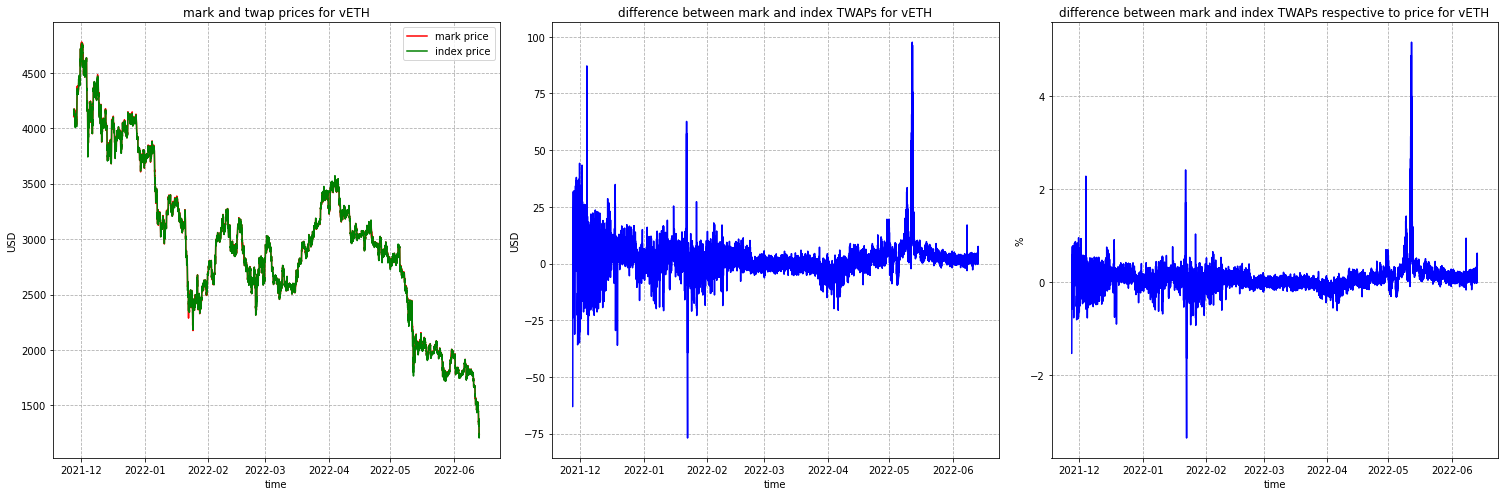

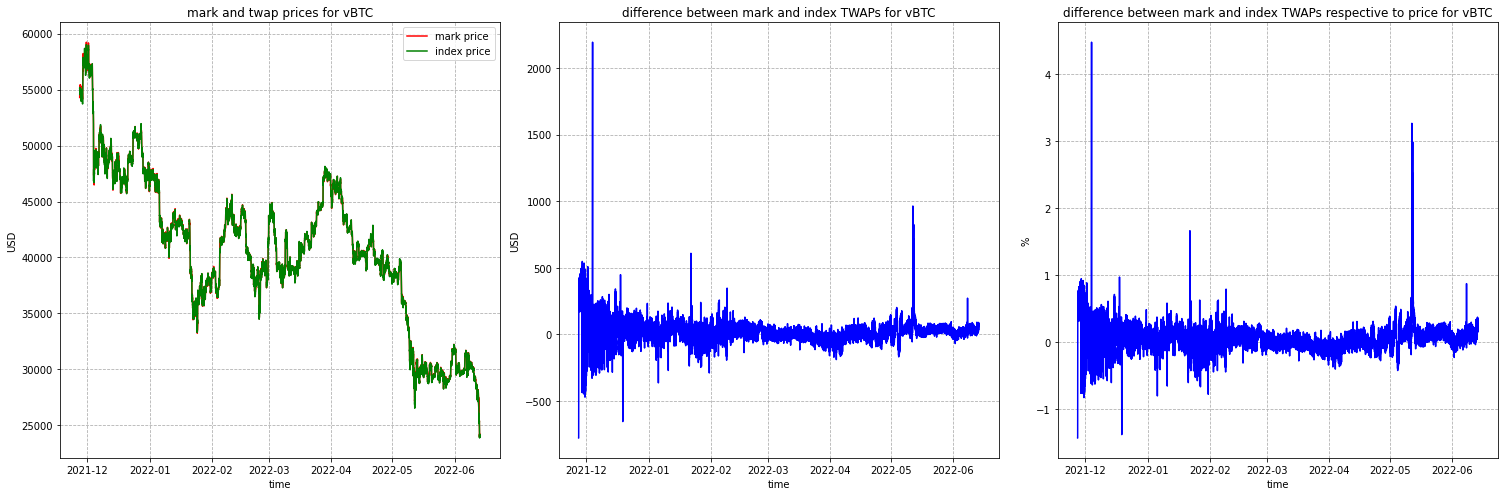

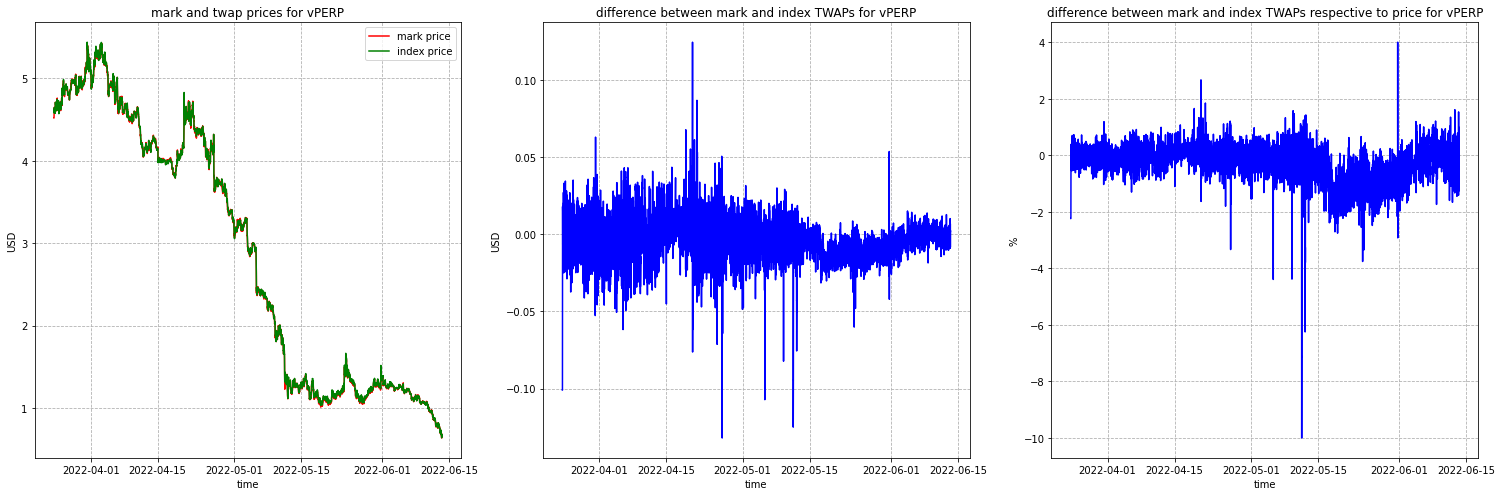

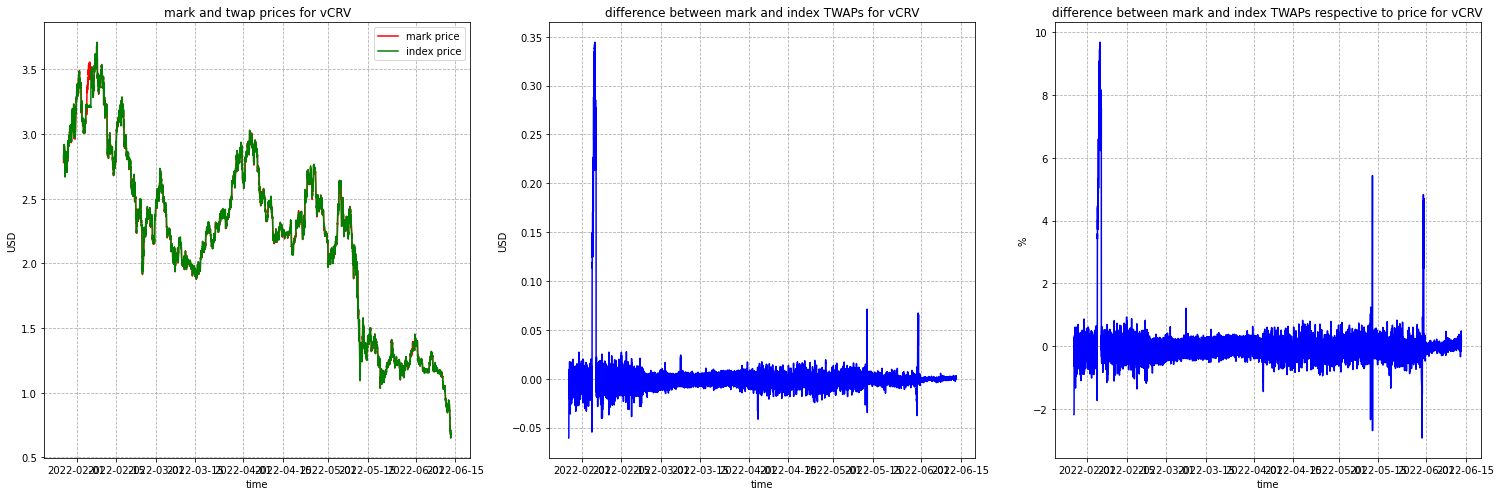

In [5]:
mark_index_twaps_for_pool(funding_updates_df, pool="vETH", xsize=21, ysize=7)
mark_index_twaps_for_pool(funding_updates_df, pool="vBTC", xsize=21, ysize=7)
mark_index_twaps_for_pool(funding_updates_df, pool="vPERP", xsize=21, ysize=7)
mark_index_twaps_for_pool(funding_updates_df, pool="vCRV", xsize=21, ysize=7)

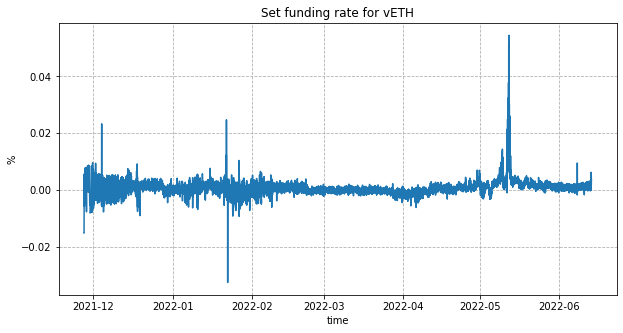

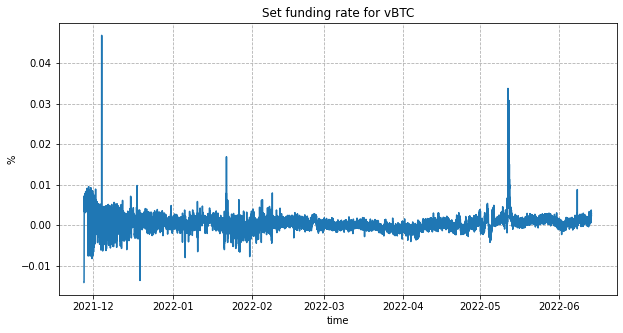

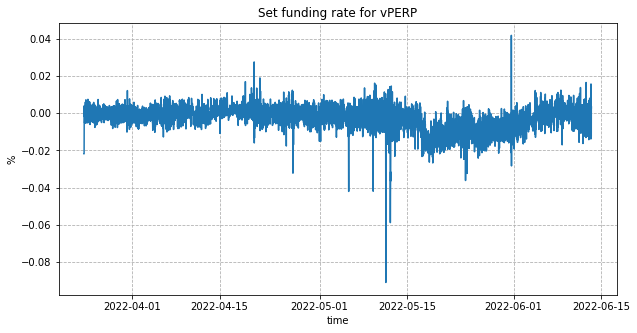

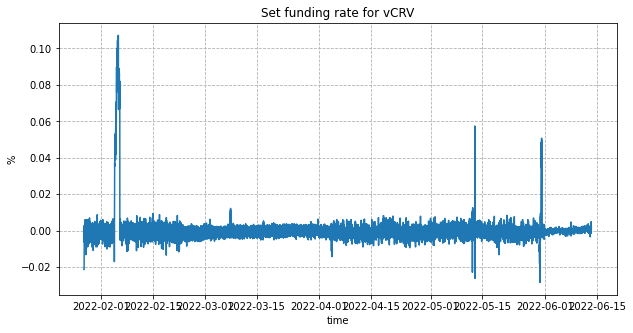

In [6]:
funding_rate_for_pool(funding_updates_df, pool='vETH', xsize=10, ysize=5)
funding_rate_for_pool(funding_updates_df, pool='vBTC', xsize=10, ysize=5)
funding_rate_for_pool(funding_updates_df, pool='vPERP', xsize=10, ysize=5)
funding_rate_for_pool(funding_updates_df, pool='vCRV', xsize=10, ysize=5)

# Funding payments

In [7]:
def funding_payment(funding_changes: pd.DataFrame, pool: str,
                         xsize: int=15, ysize: int=7):
    fig, ax = plt.subplots(figsize=(xsize, ysize))
    pool_funding_updates = funding_changes[funding_changes["pool_name"] == pool]
    ax.plot(pool_funding_updates["time"], pool_funding_updates["funding_payment"])
    ax.set_xlabel("time")
    ax.set_ylabel("USD")
    ax.set_title("Funding payment over time for " + pool)
    ax.grid(True, linestyle='--')
    plt.show()

In [8]:
funding_payments_df = pd.read_csv("funding_payments.csv")
funding_payments_df["pool_name"] = funding_payments_df["base_token"].replace(tokens_addresses_to_names_dict)
funding_payments_df = funding_payments_df.sort_values("block_number_log_index")
funding_payments_df = funding_payments_df.reset_index()
funding_payments_df["time"] = pd.to_datetime(funding_payments_df["timestamp"], unit='s')
funding_payments_df.drop(columns=["Unnamed: 0", "block_number", "index", "base_token"], inplace=True)
funding_payments_df

,id,tx_hash,funding_payment,block_number_log_index,timestamp,time,pool_name
0,0x9a9ef69c82d19bde6a2794c5de22bbb02dd3b2b4f048...,0x9a9ef69c82d19bde6a2794c5de22bbb02dd3b2b4f048...,0.000000,515560002,1638001140,2021-11-27 08:19:00,vBTC
1,0x9e2a266e4bb63ea7baaa53522ed51d7dc414df095e07...,0x9e2a266e4bb63ea7baaa53522ed51d7dc414df095e07...,0.000000,515624002,1638001245,2021-11-27 08:20:45,vBTC
2,0x79655d30e251fa6cd88d1bdeb0a3bc11d2316b6dd5ff...,0x79655d30e251fa6cd88d1bdeb0a3bc11d2316b6dd5ff...,0.000000,515740002,1638001497,2021-11-27 08:24:57,vBTC
3,0x6cf3b7acabc36423f5c80006028ef5144c006fecfb36...,0x6cf3b7acabc36423f5c80006028ef5144c006fecfb36...,0.000000,516486001,1638003992,2021-11-27 09:06:32,vETH
4,0x1f9cbc33e7ba0bb63fe8431c7356c19e2a8529a8277b...,0x1f9cbc33e7ba0bb63fe8431c7356c19e2a8529a8277b...,0.021516,516538002,1638004141,2021-11-27 09:09:01,vETH
...,...,...,...,...,...,...,...
2233233,0xa828739ea1f519ff1eec42c74ac3e181e1a9c2b2a021...,0xa828739ea1f519ff1eec42c74ac3e181e1a9c2b2a021...,-0.017055,11556910002,1655118836,2022-06-13 11:13:56,vBTC
2233234,0xd8d60f4a7edd8540230c375d911dacde2c75d8478fa4...,0xd8d60f4a7edd8540230c375d911dacde2c75d8478fa4...,-0.008583,11556921002,1655118836,2022-06-13 11:13:56,vMATIC
2233235,0x597a3a8978f8b90d7170c1ce1db73ae21d6e63831c6e...,0x597a3a8978f8b90d7170c1ce1db73ae21d6e63831c6e...,0.217805,11556939002,1655118851,2022-06-13 11:14:11,vSAND
2233236,0x208e8cbc1bccf50e2c6354321173db7efd30a3d83a75...,0x208e8cbc1bccf50e2c6354321173db7efd30a3d83a75...,0.039151,11556944002,1655118851,2022-06-13 11:14:11,vETH


                                  vETH
sum of positive funding payments for vETH = 270421.0273189068
sum of negative funding payments for vETH = -555596.9611664622


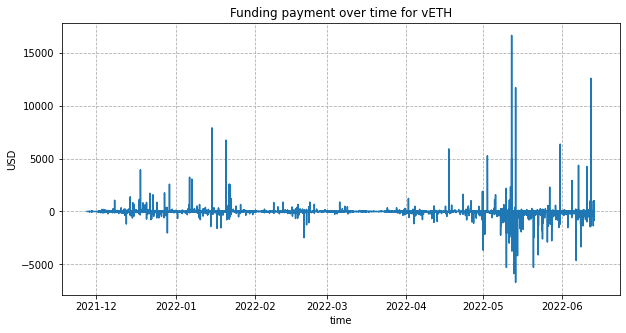

                                  vBTC
sum of positive funding payments for vBTC = 155270.56013131005
sum of negative funding payments for vBTC = -154903.5420130875


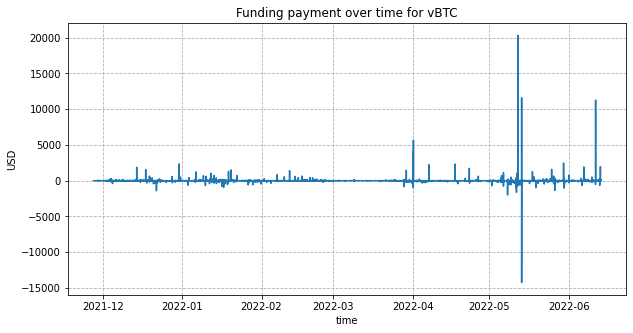

                                  vPERP
sum of positive funding payments for vPERP = 54769.81032825584
sum of negative funding payments for vPERP = -45792.241175591524


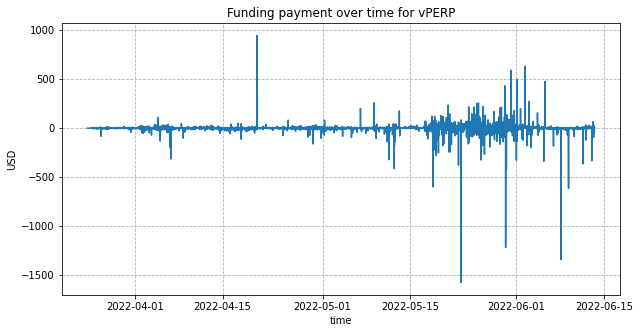

                                  vCRV
sum of positive funding payments for vCRV = 73137.12001400739
sum of negative funding payments for vCRV = -75433.22568713097


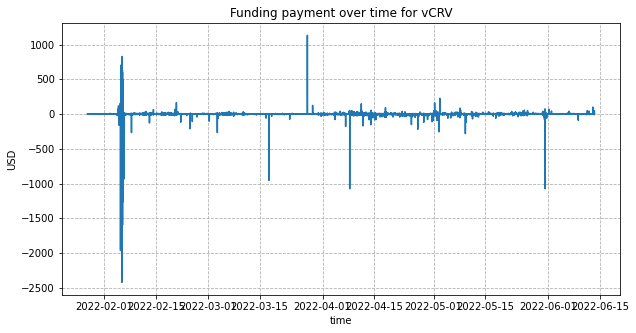

In [9]:
print("                                  vETH")
print("sum of positive funding payments for vETH = " + str(funding_payments_df[
    (funding_payments_df["pool_name"] == "vETH") &
    (funding_payments_df["funding_payment"] >= 0)
]["funding_payment"].sum()))
print("sum of negative funding payments for vETH = " + str(funding_payments_df[
    (funding_payments_df["pool_name"] == "vETH") &
    (funding_payments_df["funding_payment"] < 0)
]["funding_payment"].sum()))
funding_payment(funding_payments_df, pool='vETH', xsize=10, ysize=5)

print("                                  vBTC")
print("sum of positive funding payments for vBTC = " + str(funding_payments_df[
    (funding_payments_df["pool_name"] == "vBTC") &
    (funding_payments_df["funding_payment"] >= 0)
]["funding_payment"].sum()))
print("sum of negative funding payments for vBTC = " + str(funding_payments_df[
    (funding_payments_df["pool_name"] == "vBTC") &
    (funding_payments_df["funding_payment"] < 0)
]["funding_payment"].sum()))
funding_payment(funding_payments_df, pool='vBTC', xsize=10, ysize=5)

print("                                  vPERP")
print("sum of positive funding payments for vPERP = " + str(funding_payments_df[
    (funding_payments_df["pool_name"] == "vPERP") &
    (funding_payments_df["funding_payment"] >= 0)
]["funding_payment"].sum()))
print("sum of negative funding payments for vPERP = " + str(funding_payments_df[
    (funding_payments_df["pool_name"] == "vPERP") &
    (funding_payments_df["funding_payment"] < 0)
]["funding_payment"].sum()))
funding_payment(funding_payments_df, pool='vPERP', xsize=10, ysize=5)

print("                                  vCRV")
print("sum of positive funding payments for vCRV = " + str(funding_payments_df[
    (funding_payments_df["pool_name"] == "vCRV") &
    (funding_payments_df["funding_payment"] >= 0)
]["funding_payment"].sum()))
print("sum of negative funding payments for vCRV = " + str(funding_payments_df[
    (funding_payments_df["pool_name"] == "vCRV") &
    (funding_payments_df["funding_payment"] < 0)
]["funding_payment"].sum()))
funding_payment(funding_payments_df, pool='vCRV', xsize=10, ysize=5)